# DI-501 Term Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import itertools
import torch.optim as optim
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Data Profiling
Load the data.

In [2]:
data = pd.read_csv('Tetuan City power consumption.csv')

In [3]:
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [6]:
data.isna().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

Dataset doees not contain any missing values. It is stated in the dataset page however, it would be wise to double check.

In [ ]:
data.dtypes

DateTime                      object
Temperature                  float64
Humidity                     float64
Wind Speed                   float64
general diffuse flows        float64
diffuse flows                float64
Zone 1 Power Consumption     float64
Zone 2  Power Consumption    float64
Zone 3  Power Consumption    float64
dtype: object

Data contains an object type. DateTime column should be in datetime format. It will be converted.

In [3]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.dtypes

DateTime                     datetime64[ns]
Temperature                         float64
Humidity                            float64
Wind Speed                          float64
general diffuse flows               float64
diffuse flows                       float64
Zone 1 Power Consumption            float64
Zone 2  Power Consumption           float64
Zone 3  Power Consumption           float64
dtype: object

Check the distribution of the data.

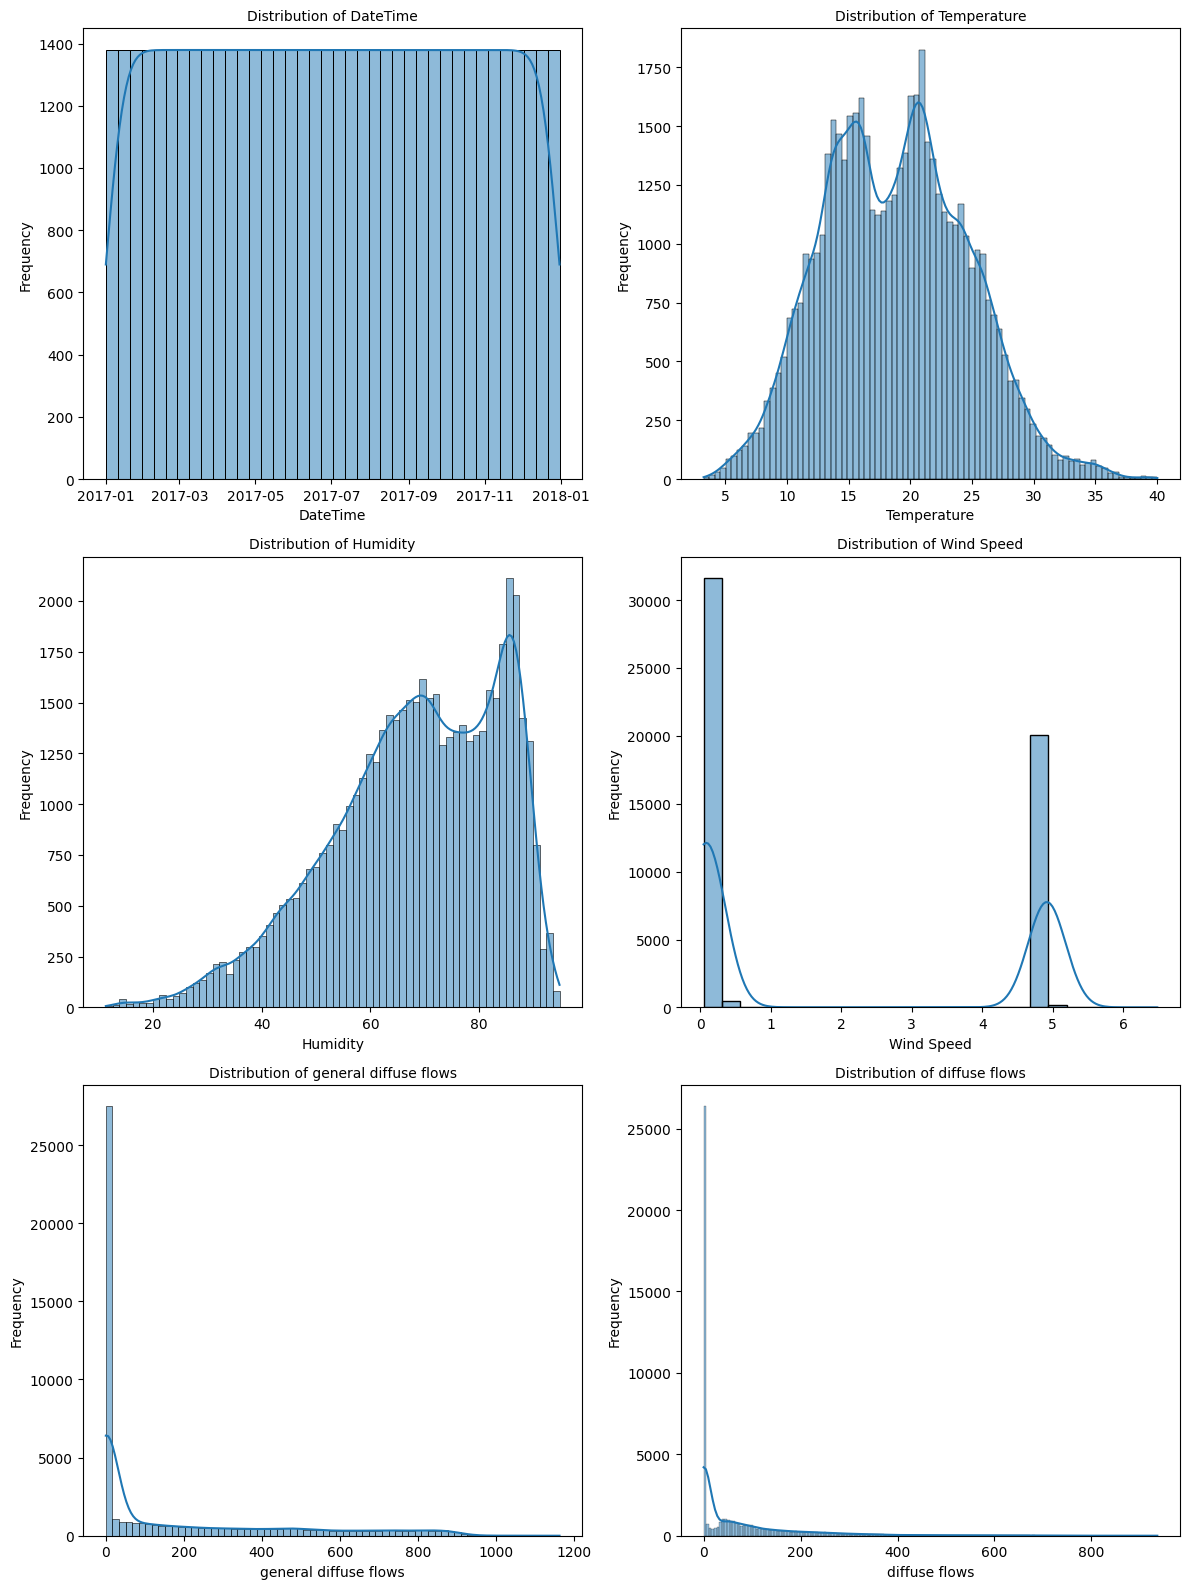

In [ ]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()
# Plotting histograms for each numerical feature
for i, col in enumerate(data.columns[:-3]):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()


Check dataset contains any disguised missing data with Q-Q plots.

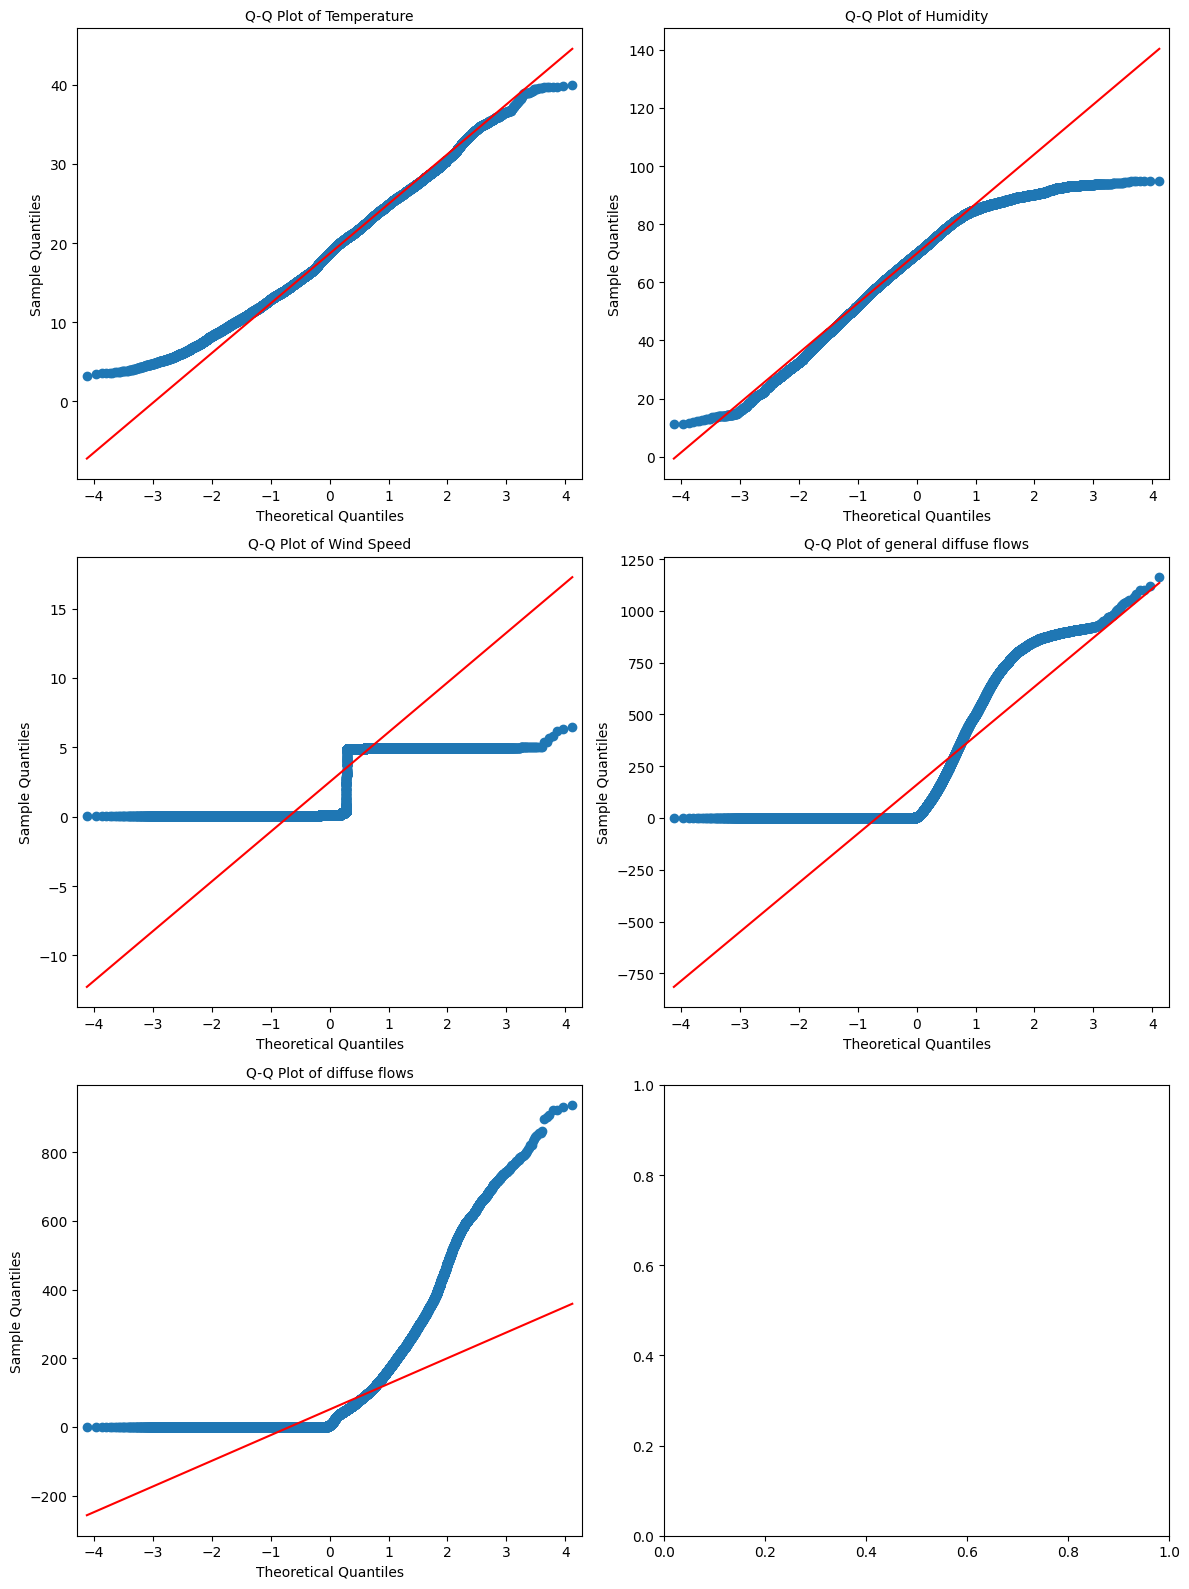

In [ ]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting histograms for each numerical feature
for i, col in enumerate(data.columns[1:-3]):
    sm.qqplot(data[col], line="q", ax=axes[i])
    axes[i].set_title(f'Q-Q Plot of {col}', fontsize=10)

# Adjust the layout
plt.tight_layout()
plt.show()

Check data for correlation of the deatures.

In [ ]:
data.corr()

<ipython-input-31-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221,0.382428,0.489527
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421,-0.294961,-0.233022
Wind Speed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444,0.146413,0.278641
general diffuse flows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965,0.157223,0.063376
diffuse flows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274,0.044667,-0.038506
Zone 1 Power Consumption,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000,0.834519,0.750733
Zone 2 Power Consumption,0.382428,-0.294961,0.146413,0.157223,0.044667,0.834519,1.000000,0.570932
Zone 3 Power Consumption,0.489527,-0.233022,0.278641,0.063376,-0.038506,0.750733,0.570932,1.000000



# Feature Selection / Importance / Elimination and Preprocessing
In this part, feature selection and importance is analyzed. For featue selection algorithm, random forest model is used using feature_importances method. After that, PCA analysis is done. Then, preprocessing steps including Box-Cox transformations and Standard Scaler analyses is done.


> **Feature Selection with Random Forest**





In [4]:
# Drop the class labels and datetime.
X = data.drop(['DateTime', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'], axis=1)

# Prepare the output classes.
y = data[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=120)

rf = RandomForestRegressor(n_estimators=100, random_state=120)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

feature_importance_ = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_ = feature_importance_.sort_values(by='Importance', ascending=False)
print(feature_importance_)

                 Feature  Importance
0            Temperature    0.407485
1               Humidity    0.203426
2             Wind Speed    0.146260
3  general diffuse flows    0.140748
4          diffuse flows    0.102082


Based on the results of the random forest model which is used as feature selection algorithm, the most important feature appears to be 'Temperature' feature. The second most important feature is 'Humidity' feature. However, all features are seems to be effecting the output of the model. Least effective feature is 'diffuse flows' but it has 10% importance. So, all of the features of the dataset will be used in the upcoming models.


> **Feature Elimination with PCA**



In [5]:
# Scale the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=None)
pca_X = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

pca_df = pd.DataFrame({'Principal Component': range(1, len(explained_variance) + 1), 'Explained Variance': explained_variance})

pca_df.head(5)

,Principal Component,Explained Variance
0,1,0.466041
1,2,0.238623
2,3,0.143922
3,4,0.083301
4,5,0.068113


Based on the results of the PCA analysis, first three principal components expalins most of the variance in the data, however since the dataset contains 5 features which is relatively small, no features are eliminated.


> **Preprocessing**



In [6]:
def boxcox_df(x):
  x_boxcox, _ = stats.boxcox(x)
  return x_boxcox

In [7]:
X_df = pd.DataFrame(data=X,index=X.index,columns=X.columns)
print('Mean and Standard Deviation before applying Box-Cox Transformation and Standad Scaler')
print(X_df.agg(['mean','std']).round())

X_boxcox = X.apply(boxcox_df, axis=0)
X_boxcox_scaled = scaler.fit_transform(X_boxcox)

X_scaled_boxcox_df = pd.DataFrame(data=X_boxcox_scaled,index=X_boxcox.index,columns=X_boxcox.columns)
print('Mean and Standard Deviation after applying Box-Cox Transformation and Standad Scaler\n')
print(X_scaled_boxcox_df.agg(['mean','std']).round())


Mean and Standard Deviation before applying Box-Cox Transformation and Standad Scaler
      Temperature  Humidity  Wind Speed  general diffuse flows  diffuse flows
mean         19.0      68.0         2.0                  183.0           75.0
std           6.0      16.0         2.0                  264.0          124.0
Mean and Standard Deviation after applying Box-Cox Transformation and Standad Scaler

      Temperature  Humidity  Wind Speed  general diffuse flows  diffuse flows
mean         -0.0      -0.0         0.0                    0.0           -0.0
std           1.0       1.0         1.0                    1.0            1.0


Box-Cox transformations non-normal data into a normal distribution. Standard Scaler centers and scales features. Box-Cox is effective as it can handle non-normal data. Tetuan City power consumption data contains non-normality. Results states that after applying Box-Cox transformations and standard scaler centers and scales the data by looking at the mean and standard deviation.

# Model Comparision

Under this section, different models such as linear regression, random forest, support vector regressor, feedforward neural networks will be investigated. For each zone, a model is generated. Dataset contains 3 different zones and for each mentioned model, 3 models will be generated.


> Linear Regression <br>

This model is constructed as a baseline model. There are no hyperparameters used.



In [8]:
y = data[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]
# Prepare the output classes.
y1 = y[['Zone 1 Power Consumption']]
y2 = y[['Zone 2  Power Consumption']]
y3 = y[['Zone 3  Power Consumption']]

# Split the data for each zone
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled_boxcox_df, y1, test_size=0.3, random_state=120)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled_boxcox_df, y2, test_size=0.3, random_state=120)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scaled_boxcox_df, y3, test_size=0.3, random_state=120)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_boxcox_df, y, test_size=0.3, random_state=120)

In [9]:
linear_model1 = LinearRegression()
linear_model1.fit(X_train1, y_train1)

linear_model2 = LinearRegression()
linear_model2.fit(X_train2, y_train2)

linear_model3 = LinearRegression()
linear_model3.fit(X_train3, y_train3)

y_pred_lr1 = linear_model1.predict(X_test1)
y_pred_lr2 = linear_model2.predict(X_test2)
y_pred_lr3 = linear_model3.predict(X_test3)

# Calculate error metrics for each zone
mse1 = mean_squared_error(y_test1, y_pred_lr1)
mae1 = mean_absolute_error(y_test1, y_pred_lr1)
r2_1 = r2_score(y_test1, y_pred_lr1)

mse2 = mean_squared_error(y_test2, y_pred_lr2)
mae2 = mean_absolute_error(y_test2, y_pred_lr2)
r2_2 = r2_score(y_test2, y_pred_lr2)

mse3 = mean_squared_error(y_test3, y_pred_lr3)
mae3 = mean_absolute_error(y_test3, y_pred_lr3)
r2_3 = r2_score(y_test3, y_pred_lr3)

print("Linear Regression Model")
print(f"Zone 1\n Mean Squared Error: {mse1}")
print(f"Mean Absolute Error: {mae1}")
print(f"R-squared: {r2_1}")
print(f"Zone 2\n Mean Squared Error: {mse2}")
print(f"Mean Absolute Error: {mae2}")
print(f"R-squared: {r2_2}")
print(f"Zone 3\n Mean Squared Error: {mse3}")
print(f"Mean Absolute Error: {mae3}")
print(f"R-squared: {r2_3}")


Linear Regression Model
Zone 1
 Mean Squared Error: 40773825.902533606
Mean Absolute Error: 5221.059094639802
R-squared: 0.20728448911343023
Zone 2
 Mean Squared Error: 22557736.09549888
Mean Absolute Error: 3825.893667841659
R-squared: 0.17368564634602135
Zone 3
 Mean Squared Error: 31852791.295139965
Mean Absolute Error: 4484.130580782651
R-squared: 0.2840214477432974




> Random Forest Regressor



In [29]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 7, 8]
}

grid_search_rf1 = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_rf1.fit(X_train1, np.ravel(y_train1))

grid_search_rf2 = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_rf2.fit(X_train2, np.ravel(y_train2))

grid_search_rf3 = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_rf3.fit(X_train3, np.ravel(y_train3))

print("ZONE 1")
print("Best parameters:", grid_search_rf1.best_params_)
print("Best score:", grid_search_rf1.best_score_)
print("\n")


print("ZONE 2")
print("Best parameters:", grid_search_rf2.best_params_)
print("Best score:", grid_search_rf2.best_score_)
print("\n")


print("ZONE 3")
print("Best parameters:", grid_search_rf3.best_params_)
print("Best score:", grid_search_rf3.best_score_)
print("\n")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  12.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  12.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  12.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  14.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  12.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  12.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  12.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  11.9s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  11.8s
[CV] END max_dep

In [30]:
best_params_rf1 = grid_search_rf1.best_params_
rf_model1 = RandomForestRegressor(n_estimators=best_params_rf1['n_estimators'],
                                      max_depth=best_params_rf1['max_depth'],
                                      min_samples_split=best_params_rf1['min_samples_split'],
                                      min_samples_leaf=best_params_rf1['min_samples_leaf'],
                                      random_state=120)

best_params_rf2 = grid_search_rf2.best_params_
rf_model2 = RandomForestRegressor(n_estimators=best_params_rf2['n_estimators'],
                                      max_depth=best_params_rf2['max_depth'],
                                      min_samples_split=best_params_rf2['min_samples_split'],
                                      min_samples_leaf=best_params_rf2['min_samples_leaf'],
                                      random_state=120)

best_params_rf3 = grid_search_rf3.best_params_
rf_model3 = RandomForestRegressor(n_estimators=best_params_rf3['n_estimators'],
                                      max_depth=best_params_rf3['max_depth'],
                                      min_samples_split=best_params_rf3['min_samples_split'],
                                      min_samples_leaf=best_params_rf3['min_samples_leaf'],
                                      random_state=120)
rf_model1.fit(X_train1, np.ravel(y_train1))
rf_model2.fit(X_train2, np.ravel(y_train2))
rf_model3.fit(X_train3, np.ravel(y_train3))

y_pred_rf1 = rf_model1.predict(X_test1)
y_pred_rf2 = rf_model2.predict(X_test2)
y_pred_rf3 = rf_model3.predict(X_test3)

# Calculate error metrics
mse1 = mean_squared_error(y_test1, y_pred_rf1)
mae1 = mean_absolute_error(y_test1, y_pred_rf1)
r2_1 = r2_score(y_test1, y_pred_rf1)

mse2 = mean_squared_error(y_test2, y_pred_rf2)
mae2 = mean_absolute_error(y_test2, y_pred_rf2)
r2_2 = r2_score(y_test2, y_pred_rf2)

mse3 = mean_squared_error(y_test3, y_pred_rf3)
mae3 = mean_absolute_error(y_test3, y_pred_rf3)
r2_3 = r2_score(y_test3, y_pred_rf3)

print("Random Forest Model\n ZONE 1")
print(f"Mean Squared Error: {mse1}")
print(f"Mean Absolute Error: {mae1}")
print(f"R-squared: {r2_1}")

print("Random Forest Model\n ZONE 2")
print(f"Mean Squared Error: {mse2}")
print(f"Mean Absolute Error: {mae2}")
print(f"R-squared: {r2_2}")

print("Random Forest Model\n ZONE 3")
print(f"Mean Squared Error: {mse3}")
print(f"Mean Absolute Error: {mae3}")
print(f"R-squared: {r2_3}")

Random Forest Model
 ZONE 1
Mean Squared Error: 23456283.11699443
Mean Absolute Error: 3424.8487163402738
R-squared: 0.5439682432785181
Random Forest Model
 ZONE 2
Mean Squared Error: 12139593.711589416
Mean Absolute Error: 2461.50047338653
R-squared: 0.555313508015749
Random Forest Model
 ZONE 3
Mean Squared Error: 13021458.232060965
Mean Absolute Error: 2505.938707908954
R-squared: 0.7073071327760017




> Support Vector Regressor



In [ ]:
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid_search_svr1 = RandomizedSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_svr1.fit(X_train1, np.ravel(y_train1))

grid_search_svr2 = RandomizedSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_svr2.fit(X_train2, np.ravel(y_train2))

grid_search_svr3 = RandomizedSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_svr3.fit(X_train3, np.ravel(y_train3))

print("ZONE 1 \nBest parameters:", grid_search_svr1.best_params_)
print("Best score:", -grid_search_svr1.best_score_)

print("ZONE 2 \nBest parameters:", grid_search_svr2.best_params_)
print("Best score:", -grid_search_svr2.best_score_)

print("ZONE 3 \nBest parameters:", grid_search_svr3.best_params_)
print("Best score:", -grid_search_svr3.best_score_)


best_params_svr1 = grid_search_svr1.best_params_
best_params_svr2 = grid_search_svr2.best_params_
best_params_svr3 = grid_search_svr3.best_params_

svr_model1 = SVR(C=best_params_svr1['C'],
                     gamma=best_params_svr1['gamma'],
                     kernel=best_params_svr1['kernel'])

svr_model2 = SVR(C=best_params_svr2['C'],
                     gamma=best_params_svr2['gamma'],
                     kernel=best_params_svr2['kernel'])

svr_model3 = SVR(C=best_params_svr3['C'],
                     gamma=best_params_svr3['gamma'],
                     kernel=best_params_svr3['kernel'])

svr_model1.fit(X_train1, y_train1)
y_pred_svr1 = svr_model1.predict(X_test1)

svr_model2.fit(X_train2, y_train2)
y_pred_svr2 = svr_model2.predict(X_test2)

svr_model3.fit(X_train3, y_train3)
y_pred_svr3 = svr_model3.predict(X_test3)

# Calculate error metrics
mse1 = mean_squared_error(y_test1, y_pred_svr1)
mae1 = mean_absolute_error(y_test1, y_pred_svr1)
r2_1 = r2_score(y_test1, y_pred_svr1)

mse2 = mean_squared_error(y_test2, y_pred_svr2)
mae2 = mean_absolute_error(y_test2, y_pred_svr2)
r2_2 = r2_score(y_test2, y_pred_svr2)

mse3 = mean_squared_error(y_test3, y_pred_svr3)
mae3 = mean_absolute_error(y_test3, y_pred_svr3)
r2_3 = r2_score(y_test3, y_pred_svr3)

print("Support Vector Regression Model \ ZONE 1 \n")
print(f"Mean Squared Error: {mse1}")
print(f"Mean Absolute Error: {mae1}")
print(f"R-squared: {r2_1}")

print("ZONE 2")
print(f"Mean Squared Error: {mse2}")
print(f"Mean Absolute Error: {mae2}")
print(f"R-squared: {r2_2}")

print("ZONE 3")
print(f"Mean Squared Error: {mse3}")
print(f"Mean Absolute Error: {mae3}")
print(f"R-squared: {r2_3}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  55.4s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  55.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  56.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  55.5s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  57.3s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  55.9s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  55.6s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  57.1s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  56.7s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  56.6s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=  57.2s
[CV] END ....................C=100, gamma=0.0001

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Regression Model \ ZONE 1 

Mean Squared Error: 41843040.70297157
Mean Absolute Error: 4897.767181761848
R-squared: 0.1864970565383577
ZONE 2
Mean Squared Error: 22186070.28814158
Mean Absolute Error: 3645.416915255694
R-squared: 0.18730016821477447
ZONE 3
Mean Squared Error: 32400445.96343771
Mean Absolute Error: 4349.531776369941
R-squared: 0.2717114120886114




> Feed Forward Neural Network



In [14]:
class SimpleNN(nn.Module):
  def __init__(self, input_size, activation_fn=nn.ReLU()):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 12)
        self.fc2 = nn.Linear(12, 3)
        self.activation_fn = activation_fn

  def forward(self, x):
      x = self.activation_fn(self.fc1(x))
      x = self.fc2(x)
      return x

def create_model(activation_fn):
    if activation_fn == 'relu':
        activation = nn.ReLU()
    elif activation_fn == 'tanh':
        activation = nn.Tanh()
    else:
        raise ValueError("Unsupported activation function")

    model = SimpleNN(input_size=5, activation_fn=activation)
    return model

param_grid = {
    'batch_size': [10, 20],
    'optimizer': ['adam', 'SGD'],
    'activation': ['relu', 'tanh']
}
X_train_tensor = torch.tensor(X_train.values).float()
y_train_tensor = torch.tensor(y_train.values).float()

from torch.utils.data import TensorDataset, DataLoader
epochs = 20
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, shuffle=True)
criterion = nn.MSELoss()

for params in itertools.product(*param_grid.values()):
    batch_size, optimizer_name, activation = params

    model = create_model(activation)
    #model.cuda()
    if optimizer_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.01)

    for epoch in range(epochs):
      for i, (inputs, targets) in enumerate(train_loader):
        #inputs = inputs.cuda()
        #targets = targets.cuda()
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        #Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
      if epoch % 1 == 0:
          print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    print(f"Params: {params}, Evaluation Result: {loss}")


Epoch [1/20], Loss: 94170016.0000
Epoch [2/20], Loss: 23106114.0000
Epoch [3/20], Loss: 10514094.0000
Epoch [4/20], Loss: 19525402.0000
Epoch [5/20], Loss: 63300476.0000
Epoch [6/20], Loss: 89412280.0000
Epoch [7/20], Loss: 513928.8438
Epoch [8/20], Loss: 7853305.5000
Epoch [9/20], Loss: 30830110.0000
Epoch [10/20], Loss: 21487106.0000
Epoch [11/20], Loss: 3961611.2500
Epoch [12/20], Loss: 11565133.0000
Epoch [13/20], Loss: 37992204.0000
Epoch [14/20], Loss: 8808553.0000
Epoch [15/20], Loss: 7815557.5000
Epoch [16/20], Loss: 69363768.0000
Epoch [17/20], Loss: 5929274.0000
Epoch [18/20], Loss: 3065033.7500
Epoch [19/20], Loss: 84930368.0000
Epoch [20/20], Loss: 102190880.0000
Params: (10, 'adam', 'relu'), Evaluation Result: 102190880.0
Epoch [1/20], Loss: 972709632.0000
Epoch [2/20], Loss: 106284152.0000
Epoch [3/20], Loss: 684447040.0000
Epoch [4/20], Loss: 537055680.0000
Epoch [5/20], Loss: 64173020.0000
Epoch [6/20], Loss: 141817520.0000
Epoch [7/20], Loss: 337016800.0000
Epoch [8/20

In [14]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, activation_fn=nn.Tanh()):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 12)
        self.fc2 = nn.Linear(12, 3)
        self.activation_fn = activation_fn

    def forward(self, x):
        x = self.activation_fn(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN(input_size=5)

learning_rate = 0.01
epochs = 20
batch_size = 10

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

X_train_tensor = torch.tensor(X_train.values).float()
y_train_tensor = torch.tensor(y_train.values).float()

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#model.cuda()
for epoch in range(epochs):
  for i, (inputs, targets) in enumerate(train_loader):
    #inputs = inputs.cuda()
    #targets = targets.cuda()
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    #Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  if epoch % 1 == 0:
      print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loss: 594591744.0000
Epoch [2/20], Loss: 931189312.0000
Epoch [3/20], Loss: 391044224.0000
Epoch [4/20], Loss: 981019648.0000
Epoch [5/20], Loss: 818135552.0000
Epoch [6/20], Loss: 874220736.0000
Epoch [7/20], Loss: 801607360.0000
Epoch [8/20], Loss: 735610304.0000
Epoch [9/20], Loss: 1489658496.0000
Epoch [10/20], Loss: 89998560.0000
Epoch [11/20], Loss: 140165664.0000
Epoch [12/20], Loss: 403459872.0000
Epoch [13/20], Loss: 245705552.0000
Epoch [14/20], Loss: 202486000.0000
Epoch [15/20], Loss: 391105248.0000
Epoch [16/20], Loss: 382951936.0000
Epoch [17/20], Loss: 473631008.0000
Epoch [18/20], Loss: 328223584.0000
Epoch [19/20], Loss: 95580248.0000
Epoch [20/20], Loss: 206080080.0000


In [15]:
X_test_tensor = torch.tensor(X_test.values).float()
y_test_tensor = torch.tensor(y_test.values).float()

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

from sklearn.metrics import r2_score

model.eval()

all_outputs = []
all_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        all_outputs.append(outputs)
        all_targets.append(targets)

all_outputs = torch.cat(all_outputs, dim=0)
all_targets = torch.cat(all_targets, dim=0)

mse = nn.MSELoss()(all_outputs, all_targets)
mae = nn.L1Loss()(all_outputs, all_targets)

r2 = r2_score(all_targets.cpu(), all_outputs.cpu())

print(f"MSE: {mse.item()}, MAE: {mae.item()}, R2: {r2}")



MSE: 284419904.0, MAE: 14357.6982421875, R2: -5.57514100323374


# Interpretability


> In this section, influence of each feature on decision making is investigated using shap library.



In [16]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.4 MB/s eta 0:00:00


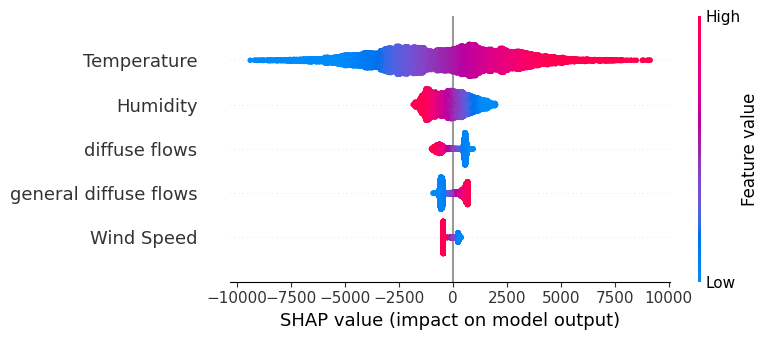

In [17]:
import shap
e = shap.Explainer(linear_model1, X_train1)
shap_values = e(X_test1)

shap.summary_plot(shap_values, X_test1, feature_names=X_test.columns)

100%|===================| 15718/15725 [23:00<00:00]       

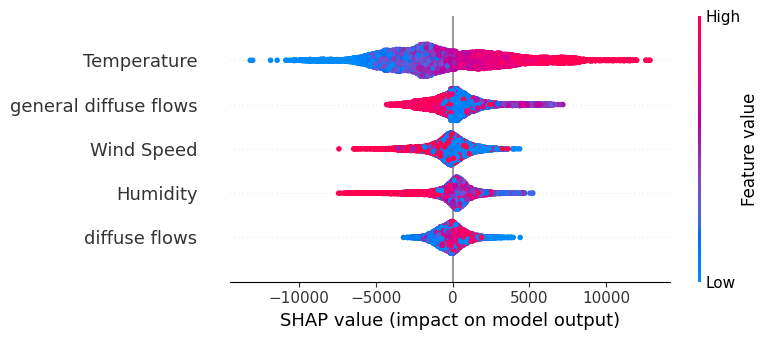

In [18]:
e = shap.Explainer(rf_model1, X_train1)
shap_values = e(X_test1, check_additivity=False)

shap.summary_plot(shap_values, X_test1, feature_names=X_test.columns)

# Statistical Test



> In this section, ANOVA test is applied to investigate the difference in power consumption in different temperature zones.



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway

In [25]:
def check_normality(data, column):
    plt.figure(figsize=(12, 6))

    for i, zone in enumerate(data['Temperature Zone'].unique(), 1):
        plt.subplot(2, 2, i)
        zone_data = data[data['Temperature Zone'] == zone][column]
        stats.probplot(zone_data, dist="norm", plot=plt)
        plt.title(f'Q-Q Plot for {column} in {zone}')

    plt.tight_layout()
    plt.show()

    # Perform Shapiro-Wilk test
    print(f"Shapiro-Wilk Test for Normality - {column}")
    for zone in data['Temperature Zone'].unique():
        zone_data = data[data['Temperature Zone'] == zone][column]
        _, p_value = stats.shapiro(zone_data)
        print(f"Temperature Zone {zone}: p-value = {p_value:.4f}")

Seperate temperature in four different zones and check normality.

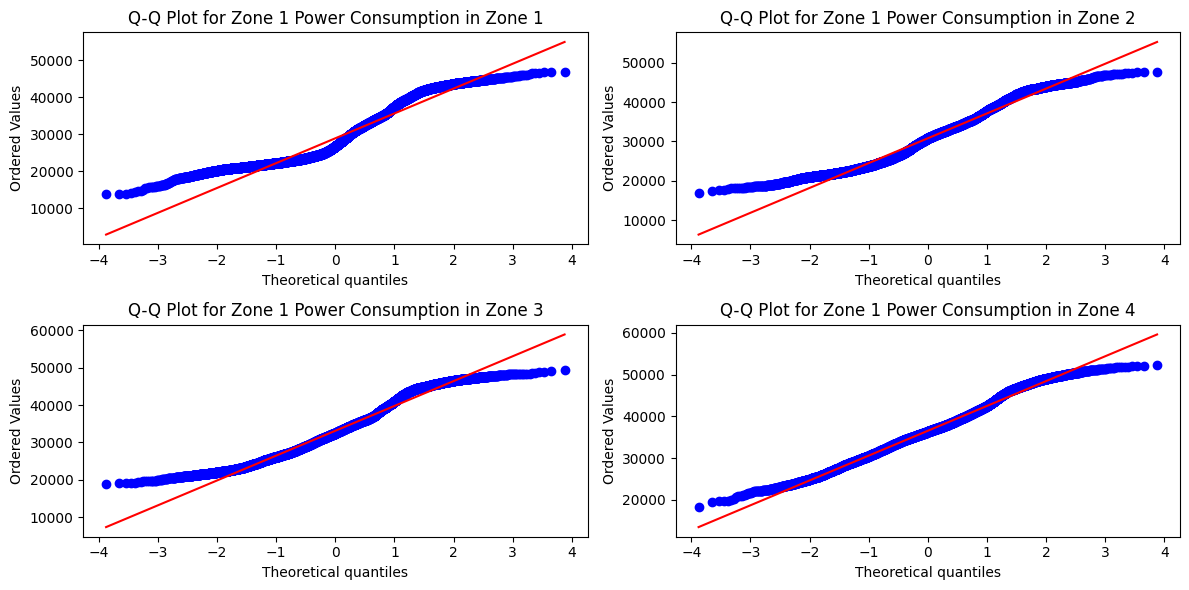

Shapiro-Wilk Test for Normality - Zone 1 Power Consumption
Temperature Zone Zone 1: p-value = 0.0000
Temperature Zone Zone 2: p-value = 0.0000
Temperature Zone Zone 3: p-value = 0.0000
Temperature Zone Zone 4: p-value = 0.0000


p-value may not be accurate for N > 5000.


In [26]:
data = pd.read_csv('Tetuan City power consumption.csv')

num_zones = 4
data['Temperature Zone'] = pd.qcut(data['Temperature'], q=num_zones, labels=[f"Zone {i+1}" for i in range(num_zones)])

temperature_zone_distribution = data['Temperature Zone'].value_counts()

temperature_zone_distribution
check_normality(data, 'Zone 1 Power Consumption')

Apply log transformation.

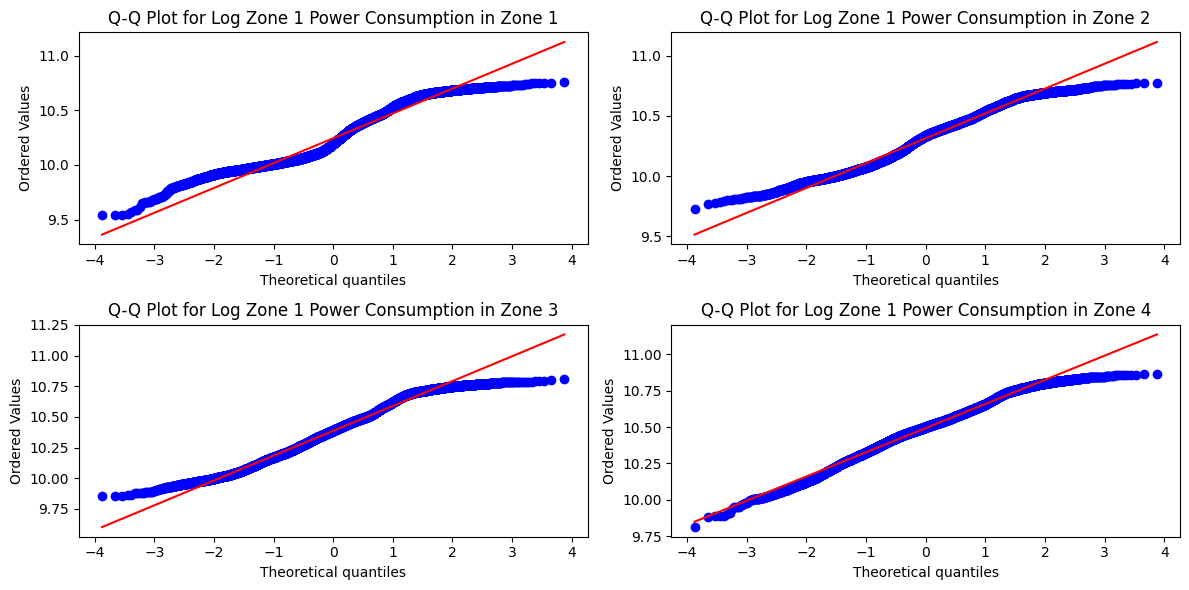

Shapiro-Wilk Test for Normality - Log Zone 1 Power Consumption
Temperature Zone Zone 1: p-value = 0.0000
Temperature Zone Zone 2: p-value = 0.0000
Temperature Zone Zone 3: p-value = 0.0000
Temperature Zone Zone 4: p-value = 0.0000


p-value may not be accurate for N > 5000.


In [27]:
data['Log Zone 1 Power Consumption'] = np.log(data['Zone 1 Power Consumption'] + 1)
data['Log Zone 2 Power Consumption'] = np.log(data['Zone 2  Power Consumption'] + 1)
data['Log Zone 3 Power Consumption'] = np.log(data['Zone 3  Power Consumption'] + 1)

check_normality(data, 'Log Zone 1 Power Consumption')

In [28]:
def perform_anova(data, column):
    print(f"ANOVA Test - {column}")
    zone_data = [data[data['Temperature Zone'] == zone][column] for zone in data['Temperature Zone'].cat.categories]
    stat, p_value = f_oneway(*zone_data)
    print(f"F-statistic = {stat:.4f}, p-value = {p_value:.4f}\n")

perform_anova(data, 'Log Zone 1 Power Consumption')
perform_anova(data, 'Log Zone 2 Power Consumption')
perform_anova(data, 'Log Zone 3 Power Consumption')

ANOVA Test - Log Zone 1 Power Consumption
F-statistic = 3533.9239, p-value = 0.0000

ANOVA Test - Log Zone 2 Power Consumption
F-statistic = 2492.6981, p-value = 0.0000

ANOVA Test - Log Zone 3 Power Consumption
F-statistic = 4830.4538, p-value = 0.0000

